In [1]:
%pylab inline
import os
import seaborn as sns
import pickle as pkl
pal = sns.color_palette('Blues')
sns.set_context("paper", font_scale=1.5)
sns.set_style("ticks")
#sns.set(color_codes=True)
from scipy.stats import gaussian_kde
import pandas as pd
from eod import stations_cc

Populating the interactive namespace from numpy and matplotlib


In [121]:
def read_dic_eqpBin(dic70):
    alog = dic70['area']
    log=np.log10(alog)
    drain = dic70['rain']

    thresh = np.squeeze(dic70['thresh'])
    rthresh = np.array([thresh]*alog.shape[1]).transpose()

    ok = np.where(np.isfinite(drain))
    drain70=drain[ok]
    alog70 = alog[ok]
    log70 = log[ok]
    dthresh70 = rthresh.copy()[ok]

    cent = np.arange(10,101,10)
    iscent=[1000]
    for c in cent:
        p=np.percentile(alog70[(alog70>=1000)],c)
        iscent.append(p)

    sizes = np.array(iscent)

    ll = []
    area = []
    nb = []
    center = sizes[0:-1] + (sizes[1::] - sizes[0:-1]) / 2
    width = (sizes[1::] - sizes[0:-1])
#
    for ind, siz in enumerate(sizes):
       
        if siz == 1000:
            continue
        
        pos = np.where((alog70 < siz) & (alog70 >= sizes[ind-1]))
        aarea = alog70[pos]
        ptresh = drain70[pos]
        ttresh = dthresh70[pos]
        prob=np.sum(ptresh>ttresh)
        
        #center.append(np.mean(aarea))
        ll.append(prob)
        area.append(np.sum(aarea))
        nb.append(ptresh.size)
    return(np.array(ll), np.array(area), np.array(nb), np.array(center), np.array(width), np.array(iscent))    

In [122]:
def read_dic_eqBinsize(dic70):
    alog = dic70['area']
    log=np.log10(alog)
    drain = dic70['rain']

    thresh = np.squeeze(dic70['thresh'])
    rthresh = np.array([thresh]*alog.shape[1]).transpose()

    ok = np.where(np.isfinite(drain))
    drain70=drain[ok]
    alog70 = alog[ok]
    log70 = log[ok]
    dthresh70 = rthresh.copy()[ok]

    sizes = np.arange(1000,500000, 5000)
    ll = []
    area = []
    nb = []
    center = sizes[0:-1] + (sizes[1::] - sizes[0:-1]) / 2
    width = (sizes[1::] - sizes[0:-1])
#
    for ind, siz in enumerate(sizes):
       
        if siz == 1000:
            continue
        
        pos = np.where((alog70 < siz) & (alog70 >= sizes[ind-1]))
        aarea = alog70[pos]
        ptresh = drain70[pos]
        ttresh = dthresh70[pos]
        prob=np.sum(ptresh>ttresh)
        
      #  center.append(np.mean(aarea))
        ll.append(prob)
        area.append(np.sum(aarea))
        nb.append(ptresh.size)
    return(np.array(ll), np.array(area), np.array(nb), np.array(center), np.array(width) , np.array(sizes))   

In [123]:
dic70 = stations_cc.readStation_both(70)
dic40 = stations_cc.readStation_both(40)
dic60 = stations_cc.readStation_both(60)

In [124]:
f70 = read_dic_eqpBin(dic70)
f40 = read_dic_eqpBin(dic40)
f60 = read_dic_eqpBin(dic60)
tf70 = read_dic_eqBinsize(dic70)
tf40 = read_dic_eqBinsize(dic40)
tf60 = read_dic_eqBinsize(dic60)

In [125]:
f40[3]

array([  23901.35,   71448.85,  116813.85,  157150.85,  197335.25,
        243765.55,  296627.8 ,  361103.  ,  455777.7 ,  888715.2 ])

In [126]:
f40[3]-f40[4]/2

array([   1000. ,   46802.7,   96095. ,  137532.7,  176769. ,  217901.5,
        269629.6,  323626. ,  398580. ,  512975.4])

In [127]:
f40[2]

array([627, 626, 626, 625, 627, 626, 621, 627, 630, 625])

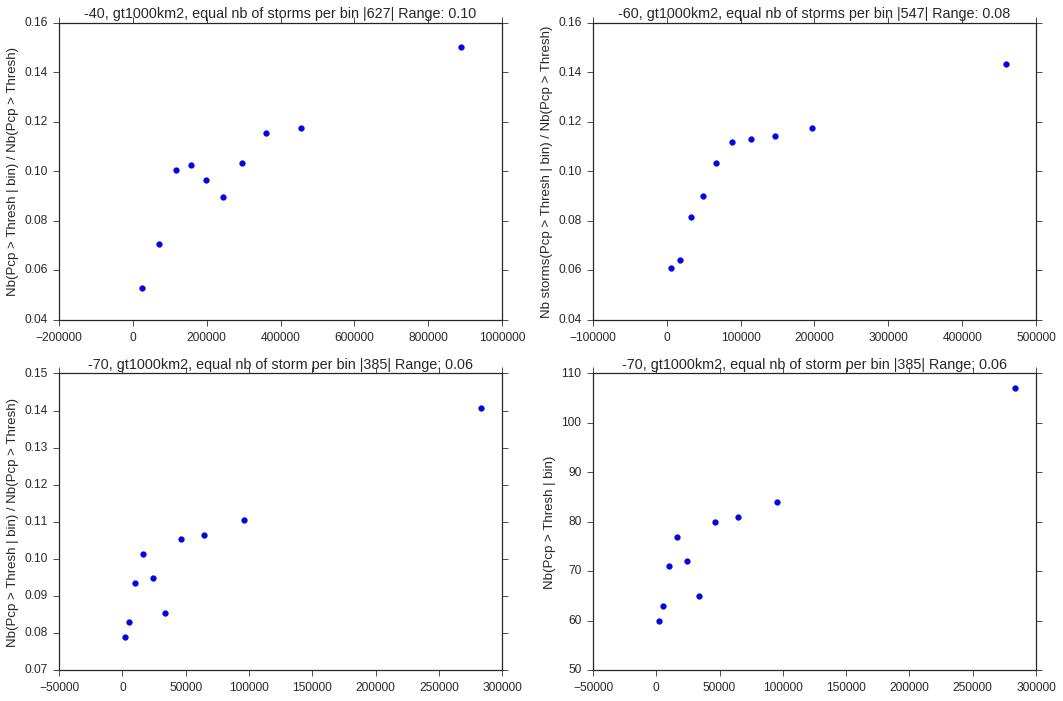

In [128]:
path = '/users/global/cornkle/C_paper/chris2016/figs/'
f = plt.figure(figsize=(15,10), dpi=400)

ax = f.add_subplot(221)
plt.scatter(f40[3], f40[0]/np.sum(f40[0]), s=35)
plt.ylabel("Nb(Pcp > Thresh | bin) / Nb(Pcp > Thresh)" )
plt.title("-40, gt1000km2, equal nb of storms per bin |"+str(f40[2][0])+"| Range: "+"{0:.2f}".format(np.max(f40[0]/np.sum(f40[0]))-np.min(f40[0]/np.sum(f40[0]))))

ax = f.add_subplot(222)
plt.scatter(f60[3], f60[0]/np.sum(f60[0]), s=35)
plt.ylabel("Nb storms(Pcp > Thresh | bin) / Nb(Pcp > Thresh)" )
plt.title("-60, gt1000km2, equal nb of storms per bin |"+str(f60[2][0])+"| Range: "+"{0:.2f}".format(np.max(f60[0]/np.sum(f60[0]))-np.min(f60[0]/np.sum(f60[0]))))

ax = f.add_subplot(223)
plt.scatter(f70[3], f70[0]/np.sum(f70[0]), s=35)
plt.ylabel("Nb(Pcp > Thresh | bin) / Nb(Pcp > Thresh)" )
plt.title("-70, gt1000km2, equal nb of storm per bin |"+str(f70[2][0])+"| Range: "+"{0:.2f}".format(np.max(f70[0]/np.sum(f70[0]))-np.min(f70[0]/np.sum(f70[0]))))

x = f.add_subplot(224)
plt.scatter(f70[3], f70[0], s=35)
plt.ylabel("Nb(Pcp > Thresh | bin)" )
plt.title("-70, gt1000km2, equal nb of storm per bin |"+str(f70[2][0])+"| Range: "+"{0:.2f}".format(np.max(f70[0]/np.sum(f70[0]))-np.min(f70[0]/np.sum(f70[0]))))


plt.tight_layout()
plt.savefig(path+'areabins_scatter_10cent.png')

[  23901.35   71448.85  116813.85  157150.85  197335.25  243765.55
  296627.8   361103.    455777.7   888715.2 ]


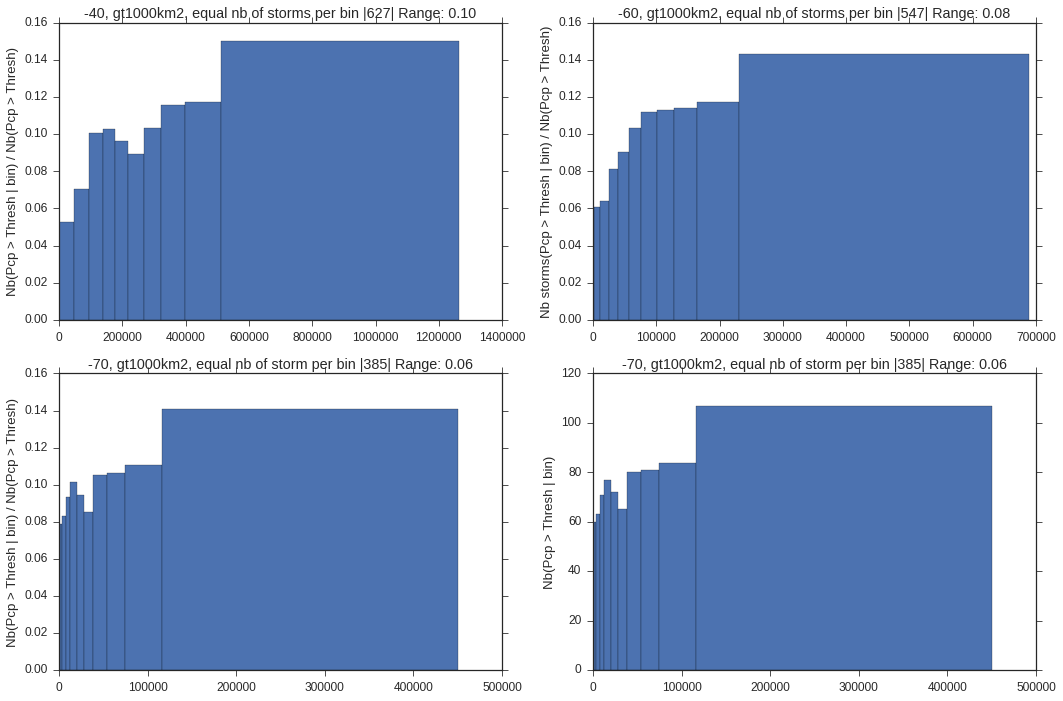

In [129]:
path = '/users/global/cornkle/C_paper/chris2016/figs/'
f = plt.figure(figsize=(15,10), dpi=400)

ax = f.add_subplot(221)
plt.bar(f40[3], f40[0]/np.sum(f40[0]), width=f40[4], align='center')
plt.ylabel("Nb(Pcp > Thresh | bin) / Nb(Pcp > Thresh)" )
plt.title("-40, gt1000km2, equal nb of storms per bin |"+str(f40[2][0])+"| Range: "+"{0:.2f}".format(np.max(f40[0]/np.sum(f40[0]))-np.min(f40[0]/np.sum(f40[0]))))

ax = f.add_subplot(222)
plt.bar(f60[3], f60[0]/np.sum(f60[0]), width=f60[4], align='center')
plt.ylabel("Nb storms(Pcp > Thresh | bin) / Nb(Pcp > Thresh)" )
plt.title("-60, gt1000km2, equal nb of storms per bin |"+str(f60[2][0])+"| Range: "+"{0:.2f}".format(np.max(f60[0]/np.sum(f60[0]))-np.min(f60[0]/np.sum(f60[0]))))

ax = f.add_subplot(223)
plt.bar(f70[3], f70[0]/np.sum(f70[0]), width=f70[4], align='center')
plt.ylabel("Nb(Pcp > Thresh | bin) / Nb(Pcp > Thresh)" )
plt.title("-70, gt1000km2, equal nb of storm per bin |"+str(f70[2][0])+"| Range: "+"{0:.2f}".format(np.max(f70[0]/np.sum(f70[0]))-np.min(f70[0]/np.sum(f70[0]))))

ax = f.add_subplot(224)
plt.bar(f70[3], f70[0], width=f70[4], align='center')
plt.ylabel("Nb(Pcp > Thresh | bin)" )
plt.title("-70, gt1000km2, equal nb of storm per bin |"+str(f70[2][0])+"| Range: "+"{0:.2f}".format(np.max(f70[0]/np.sum(f70[0]))-np.min(f70[0]/np.sum(f70[0]))))


plt.tight_layout()
plt.savefig(path+'areabins_bar_10cent.png')
print(f40[3])

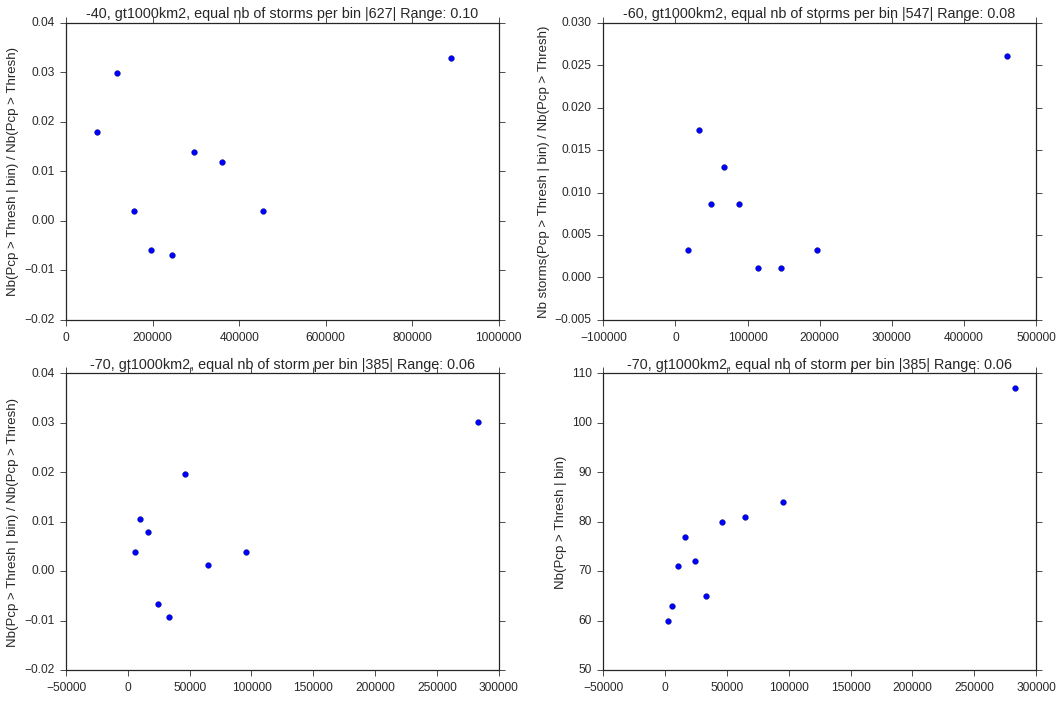

In [130]:
path = '/users/global/cornkle/C_paper/chris2016/figs/'
f = plt.figure(figsize=(15,10), dpi=400)

ax = f.add_subplot(221)
plt.scatter(f40[3][1:], (f40[0]/np.sum(f40[0]))[1:]-(f40[0]/np.sum(f40[0]))[0:-1], s=35)
plt.ylabel("Nb(Pcp > Thresh | bin) / Nb(Pcp > Thresh)" )
plt.title("-40, gt1000km2, equal nb of storms per bin |"+str(f40[2][0])+"| Range: "+"{0:.2f}".format(np.max(f40[0]/np.sum(f40[0]))-np.min(f40[0]/np.sum(f40[0]))))

ax = f.add_subplot(222)
plt.scatter(f60[3][1:], (f60[0]/np.sum(f60[0]))[1:]-(f60[0]/np.sum(f60[0]))[0:-1], s=35)
plt.ylabel("Nb storms(Pcp > Thresh | bin) / Nb(Pcp > Thresh)" )
plt.title("-60, gt1000km2, equal nb of storms per bin |"+str(f60[2][0])+"| Range: "+"{0:.2f}".format(np.max(f60[0]/np.sum(f60[0]))-np.min(f60[0]/np.sum(f60[0]))))

ax = f.add_subplot(223)
plt.scatter(f70[3][1:], (f70[0]/np.sum(f70[0]))[1:]-(f70[0]/np.sum(f70[0]))[0:-1], s=35)
plt.ylabel("Nb(Pcp > Thresh | bin) / Nb(Pcp > Thresh)" )
plt.title("-70, gt1000km2, equal nb of storm per bin |"+str(f70[2][0])+"| Range: "+"{0:.2f}".format(np.max(f70[0]/np.sum(f70[0]))-np.min(f70[0]/np.sum(f70[0]))))

x = f.add_subplot(224)
plt.scatter(f70[3], f70[0], s=35)
plt.ylabel("Nb(Pcp > Thresh | bin)" )
plt.title("-70, gt1000km2, equal nb of storm per bin |"+str(f70[2][0])+"| Range: "+"{0:.2f}".format(np.max(f70[0]/np.sum(f70[0]))-np.min(f70[0]/np.sum(f70[0]))))


plt.tight_layout()
plt.savefig(path+'areabins_scatter_gradient_10cent.png')

In [120]:
(f40[0]/np.sum(f40[0]))[1:]-(f40[0]/np.sum(f40[0]))[0:-1]

array([-0.00298805,  0.00796813,  0.00498008,  0.01593625, -0.00697211,
        0.00199203,  0.00498008, -0.0059761 ,  0.00099602, -0.00697211,
        0.0059761 ,  0.01195219, -0.01593625,  0.01693227, -0.0059761 ,
       -0.00099602,  0.00996016,  0.00298805,  0.01693227])

In [52]:
print(str(f40[2][0])+" Range: "+"{0:.2f}".format(np.max(f40[0]/np.sum(f40[0]))-np.min(f40[0]/np.sum(f40[0]))))

314 Range: 0.06


In [ ]:
path = '/users/global/cornkle/C_paper/chris2016/figs/'
f = plt.figure(figsize=(15,10), dpi=400)

ax = f.add_subplot(221)
plt.scatter(f40[3], f40[0]/np.sum(f40[0]), s=35)
plt.ylabel("Nb storms(Pcp > Thresh | bin) / Nb storms" )
plt.title("-40, gt1000km2, equal nb storms per bin")

ax = f.add_subplot(222)
plt.scatter(f60[3], f60[0]/np.sum(f60[0]), s=35)
plt.ylabel("Nb storms(Pcp > Thresh | bin) / Nb storms" )
plt.title("-60, gt1000km2, equal nb storms per bin")

ax = f.add_subplot(223)
plt.scatter(f70[3], f70[0]/np.sum(f70[0]), s=35)
plt.ylabel("Nb storms(Pcp > Thresh | bin) / Nb storms" )
plt.title("-70, gt1000km2, equal nbs storm per bin")

ax = f.add_subplot(224)
plt.scatter(f70[3], f70[0], s=35)
plt.ylabel("Nb storms(Pcp > Thresh | bin)" )
plt.title("-70, gt1000km2, equal nbs storm per bin")


plt.tight_layout()
plt.savefig(path+'MFG_areabins_new.png')

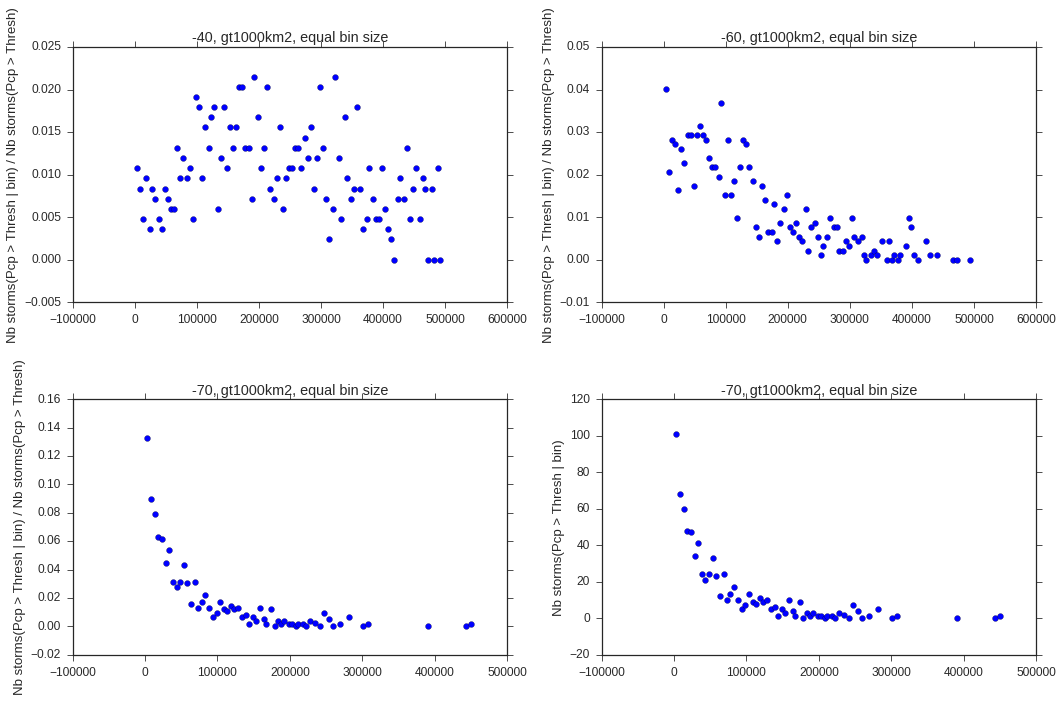

In [31]:
path = '/users/global/cornkle/C_paper/chris2016/figs/'
f = plt.figure(figsize=(15,10), dpi=400)

ax = f.add_subplot(221)
plt.scatter(tf40[3], tf40[0]/np.sum(tf40[0]), s=35)
plt.ylabel("Nb storms(Pcp > Thresh | bin) / Nb storms(Pcp > Thresh)" )
plt.title("-40, gt1000km2, equal bin size")

ax = f.add_subplot(222)
plt.scatter(tf60[3], tf60[0]/np.sum(tf60[0]), s=35)
plt.ylabel("Nb storms(Pcp > Thresh | bin) / Nb storms(Pcp > Thresh)" )
plt.title("-60, gt1000km2, equal bin size")

ax = f.add_subplot(223)
plt.scatter(tf70[3], tf70[0]/np.sum(tf70[0]), s=35)
plt.ylabel("Nb storms(Pcp > Thresh | bin) / Nb storms(Pcp > Thresh)" )
plt.title("-70, gt1000km2, equal bin size")

ax = f.add_subplot(224)
plt.scatter(tf70[3], tf70[0], s=35)
plt.ylabel("Nb storms(Pcp > Thresh | bin)" )
plt.title("-70, gt1000km2, equal bin size")


plt.tight_layout()
plt.savefig(path+'areabins_new.png')